## Introduction to visualizing data in the eeghdf files
### Goals:
- Demonstrate loading of eeghdf file
- demonstrate raw data access
- visualize data as waveform with montages in the notebook

In [1]:
# import libraries
from __future__ import print_function, division, unicode_literals
%matplotlib inline
# %matplotlib notebook

import matplotlib
import matplotlib.pyplot as plt
#import seaborn
import pandas as pd
import numpy as np
import h5py
from pprint import pprint

import eegvis.stacklineplot as stacklineplot
import eegvis.montageview as montageview

matplotlib.rcParams['figure.figsize'] = (18.0, 12.0)
#matplotlib.rcParams['figure.figsize'] = (12.0, 8.0)

In [2]:
ls "../../eeghdf/data"

absence_epilepsy.eeg.h5*  spasms.eeg.h5*  tuh_00000115_s07_a00.edf*


In [4]:
hdf = h5py.File('../../eeghdf/data/spasms.eeg.h5') # 5mo boy 

In [5]:
hdf

<HDF5 file "spasms.eeg.h5" (mode r)>

In [6]:
rec = hdf['record-0']
years_old = rec.attrs['patient_age_days']/365
pprint("age in years: %s" % years_old)

'age in years: 0.4590580923389143'


### Access the raw signals and electrode labels

In [7]:
signals = rec['signals']
labels = rec['signal_labels']
electrode_labels = [str(s,'ascii') for s in labels]
numbered_electrode_labels = ["%d:%s" % (ii, str(labels[ii], 'ascii')) for ii in range(len(labels))]

#### Simple visualization of EEG (electrodecrement seizure pattern)

In [8]:
# plot 10s epochs (multiples in DE)
ch0, ch1 = (0,19)
DE = 2 # how many 10s epochs to display
epoch = 53; ptepoch = 10*int(rec.attrs['sample_frequency'])
dp = int(0.5*ptepoch)
# stacklineplot.stackplot(signals[ch0:ch1,epoch*ptepoch+dp:(epoch+DE)*ptepoch+dp],secondsk=DE*10.0, ylabels=electrode_labels[ch0:ch1], yscale=0.3)
print("epoch:", epoch)



epoch: 53


In [9]:
matplotlib.rcParams['figure.figsize'] = (18.0, 12.0)

<AxesSubplot:xlabel='time (s)'>

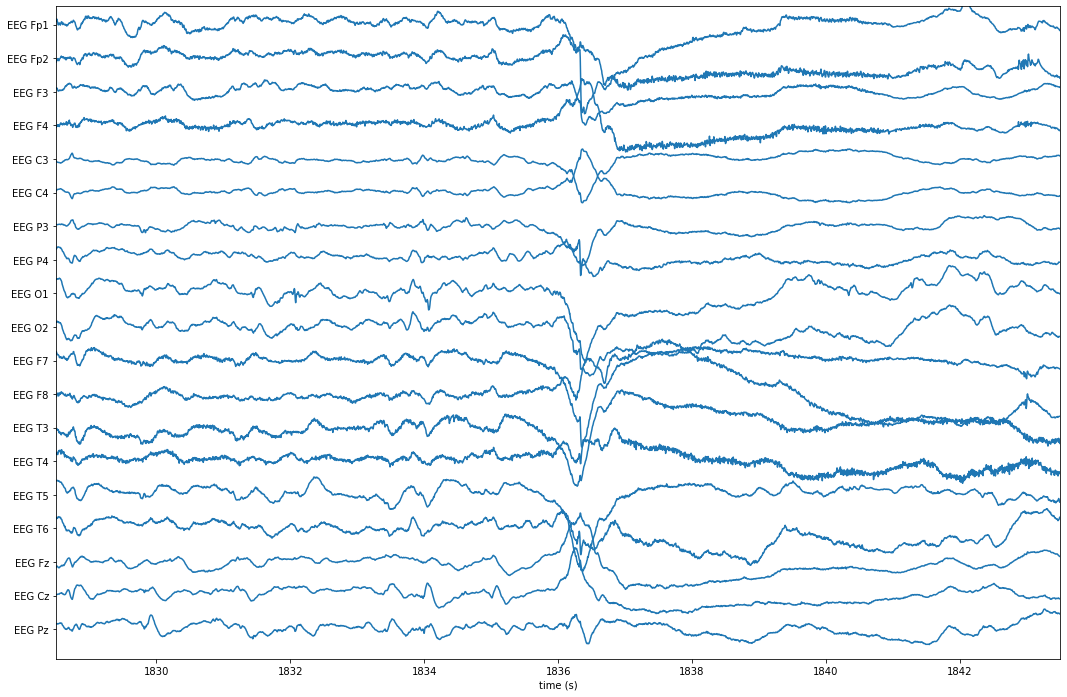

In [10]:
# search identified spasms at 1836, 1871, 1901, 1939
stacklineplot.show_epoch_centered(signals, 1836,
                        epoch_width_sec=15,
                        chstart=0, chstop=19, fs=rec.attrs['sample_frequency'],
                        ylabels=electrode_labels, yscale=3.0)



In [11]:
electrode_labels
r_labels = [ss.replace('EEG ','') for ss in electrode_labels]
r_labels

['Fp1',
 'Fp2',
 'F3',
 'F4',
 'C3',
 'C4',
 'P3',
 'P4',
 'O1',
 'O2',
 'F7',
 'F8',
 'T3',
 'T4',
 'T5',
 'T6',
 'Fz',
 'Cz',
 'Pz',
 'E',
 'Pg1',
 'Pg2',
 'A1',
 'A2',
 'FT9',
 'FT10',
 'ECG X1',
 'X2',
 'X3',
 'X4',
 'X5',
 'X6',
 'X7',
 'Mark1',
 'Mark2',
 'Events/Markers']

In [11]:
montageview.DB_LABELS

['Fp1-F7',
 'F7-T3',
 'T3-T5',
 'T5-O1',
 'Fp2-F8',
 'F8-T4',
 'T4-T6',
 'T6-O2',
 'Fp1-F3',
 'F3-C3',
 'C3-P3',
 'P3-O1',
 'Fp2-F4',
 'F4-C4',
 'C4-P4',
 'P4-O2',
 'Fz-Cz',
 'Cz-Pz']

In [12]:
monv = montageview.MontageView(montageview.DB_LABELS, r_labels)

In [13]:
v = montageview.double_banana_set_matrix(monv.V)
v
dfv = v.to_dataframe(name='doublebanana')

In [14]:
res = np.dot(monv.V.data,signals[:, 10000:10099]) # example of how to do transformation
signals.dtype

dtype('int16')

In [15]:
# access the coordinate labels in the xarray
[xx for xx in monv.V.coords['x'].data]

['Fp1-F7',
 'F7-T3',
 'T3-T5',
 'T5-O1',
 'Fp2-F8',
 'F8-T4',
 'T4-T6',
 'T6-O2',
 'Fp1-F3',
 'F3-C3',
 'C3-P3',
 'P3-O1',
 'Fp2-F4',
 'F4-C4',
 'C4-P4',
 'P4-O2',
 'Fz-Cz',
 'Cz-Pz']

In [16]:
[yy for yy in monv.V.coords['y'].data]


['Fp1',
 'Fp2',
 'F3',
 'F4',
 'C3',
 'C4',
 'P3',
 'P4',
 'O1',
 'O2',
 'F7',
 'F8',
 'T3',
 'T4',
 'T5',
 'T6',
 'Fz',
 'Cz',
 'Pz',
 'E',
 'Pg1',
 'Pg2',
 'A1',
 'A2',
 'FT9',
 'FT10',
 'ECG X1',
 'X2',
 'X3',
 'X4',
 'X5',
 'X6',
 'X7',
 'Mark1',
 'Mark2',
 'Events/Markers']

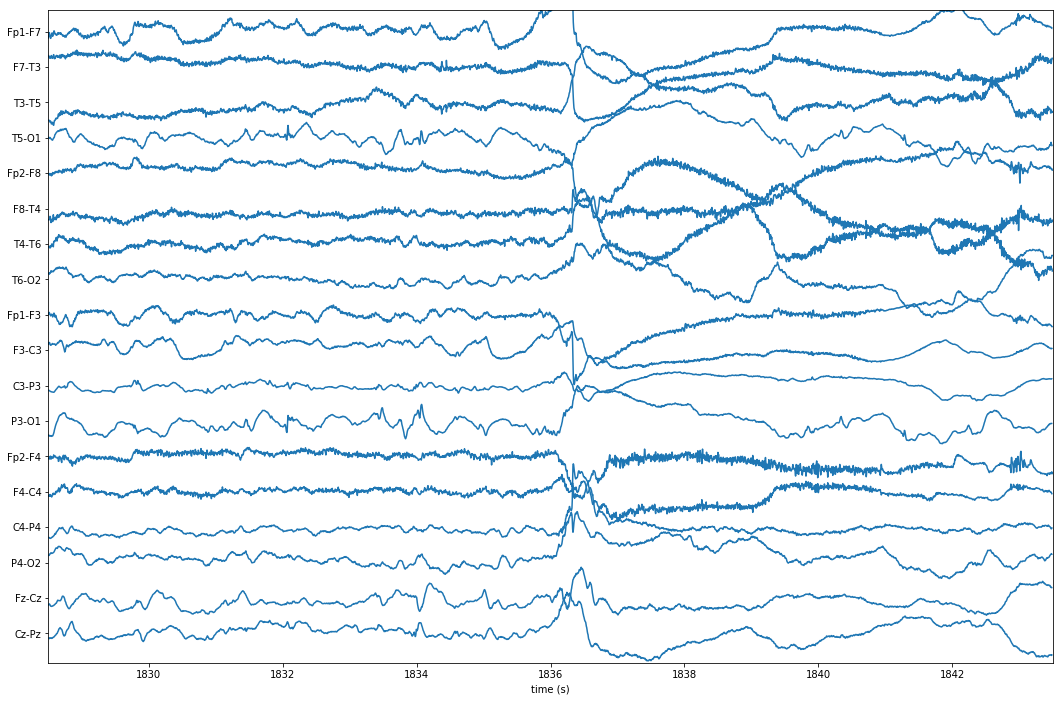

In [17]:
stacklineplot.show_montage_centered(signals, monv,1836,
                        epoch_width_sec=15,
                        chstart=0, chstop=19, fs=rec.attrs['sample_frequency'],
                        ylabels=electrode_labels, yscale=3.0) 

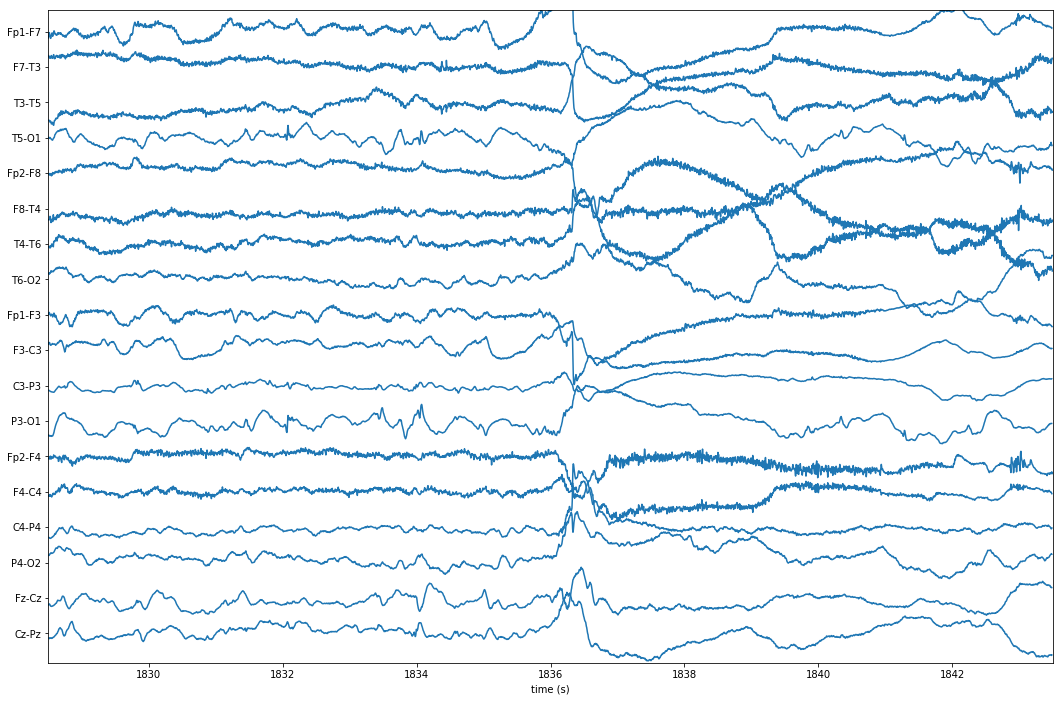

In [18]:
stacklineplot.show_montage_centered(signals, monv,1836,
                        epoch_width_sec=15,
                        chstart=0, chstop=19, fs=rec.attrs['sample_frequency'],
                        ylabels=electrode_labels, yscale=3.0) 
fg = plt.gcf()
fg.savefig('spasm_example.eps')

In [19]:
# plt.figure?

In [20]:
annot = rec['edf_annotations']
#print(list(annot.items()))
#annot['texts'][:]

In [21]:
signals.shape

(36, 446000)

In [22]:
antext = [s.decode('utf-8') for s in annot['texts'][:]]
starts100ns = [xx for xx in annot['starts_100ns'][:]]
len(starts100ns), len(antext)

(66, 66)

In [23]:
import pandas as pd

In [24]:
df = pd.DataFrame(data=antext, columns=['text'])
df['starts100ns'] = starts100ns
df['starts_sec'] = df['starts100ns']/10**7

In [25]:
df # look at the annotations

,text,starts100ns,starts_sec
0,REC START Biocal CAL,0,0.000
1,A1+A2 OFF,11400000,1.140
2,PAT Biocal EEG,61900000,6.190
3,PAT A_DB EEG,114200000,11.420
4,IMP CHECK ON,564500000,56.450
5,IMP CHECK OFF,593500000,59.350
6,resting on right sid,731150000,73.115
7,head on right side,772180000,77.218
8,head on neckroll,809810000,80.981
9,nursnig quietly,856350000,85.635


In [26]:
df[df.text.str.contains('sz',case=False)]

,text,starts100ns,starts_sec


In [27]:
df[df.text.str.contains('seizure',case=False)] # find the seizure

,text,starts100ns,starts_sec


In [28]:
df[df.text.str.contains('spasm',case=False)] # find the seizure

,text,starts100ns,starts_sec
54,SPASM?,18367010000,1836.701
55,SPASM?,18710300000,1871.030
56,SPASM,19014460000,1901.446
57,SPASM,19388010000,1938.801


In [29]:
list(annot.items())

[('durations_char16',
  <HDF5 dataset "durations_char16": shape (66,), type "|S16">),
 ('starts_100ns', <HDF5 dataset "starts_100ns": shape (66,), type "<i8">),
 ('texts', <HDF5 dataset "texts": shape (66,), type "|O">)]

2.6*10**12 /10

In [30]:
monv.V

<xarray.DataArray (x: 18, y: 36)>
array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])
Coordinates:
  * x        (x) <U6 'Fp1-F7' 'F7-T3' 'T3-T5' 'T5-O1' 'Fp2-F8' 'F8-T4' ...
  * y        (y) <U14 'Fp1' 'Fp2' 'F3' 'F4' 'C3' 'C4' 'P3' 'P4' 'O1' 'O2' ...

In [31]:
import matplotlib.pyplot as plt

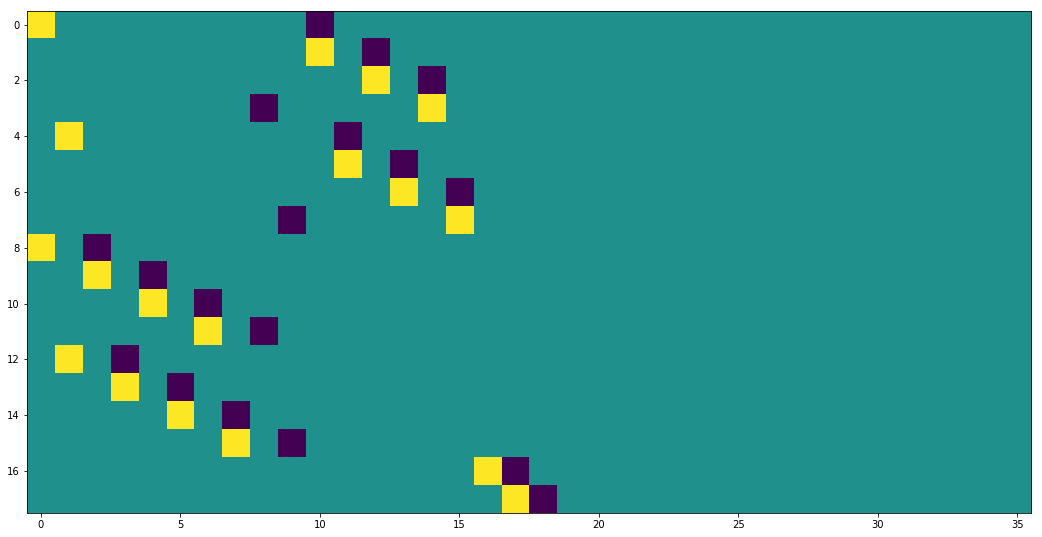

In [32]:
plt.imshow(monv.V)

In [33]:
lapmv = montageview.LaplacianMontageView(r_labels)

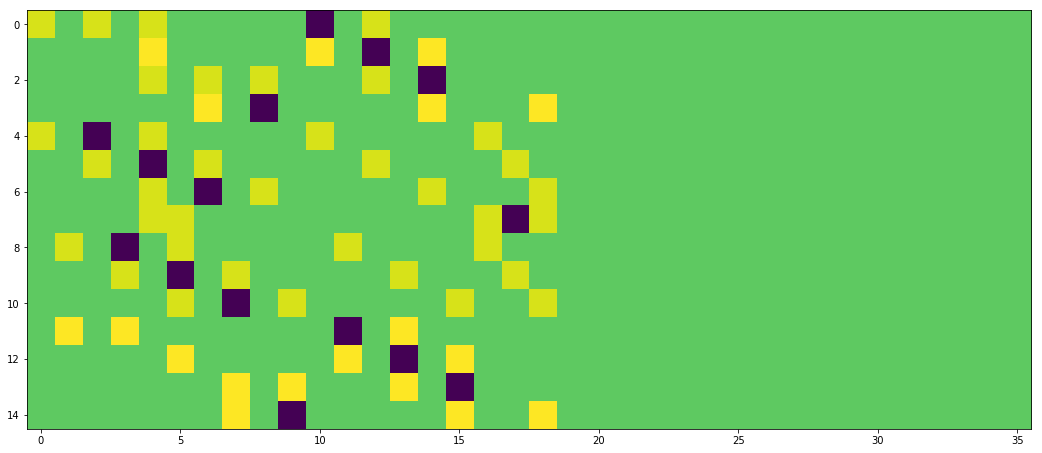

In [34]:
plt.imshow(lapmv.V)

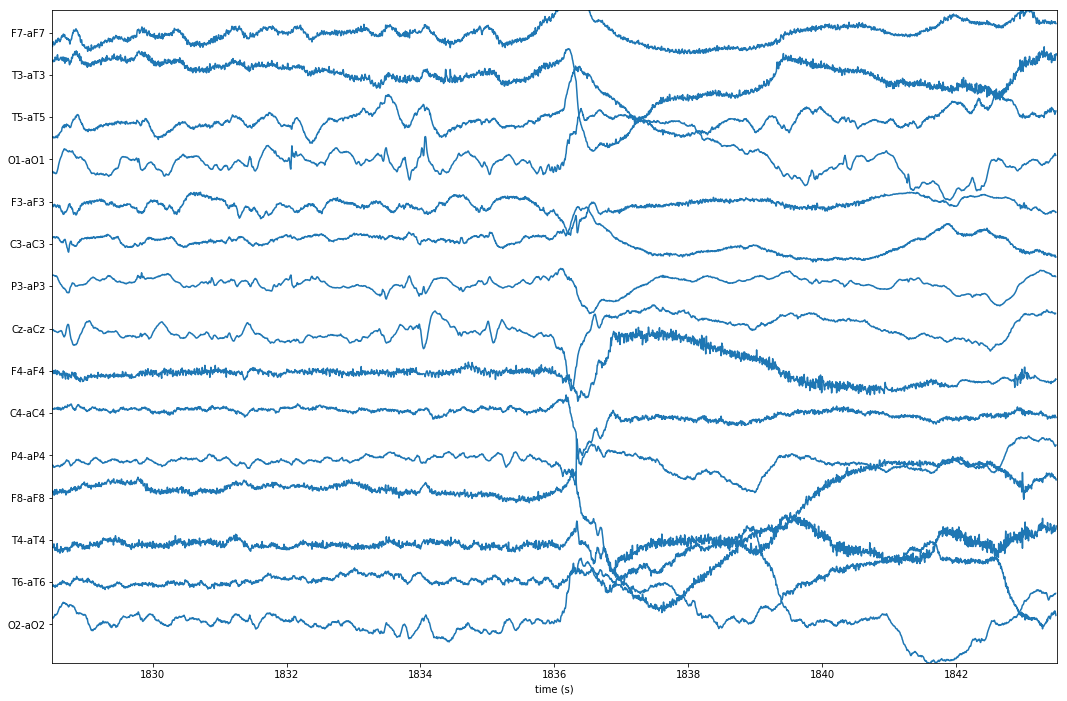

In [35]:
stacklineplot.show_montage_centered(signals, lapmv,1836,
                        epoch_width_sec=15,
                        chstart=0, chstop=19, fs=rec.attrs['sample_frequency'],
                        ylabels=electrode_labels, yscale=3.0, topdown=True) 
fg = plt.gcf()

In [36]:
# %pdb on

In [37]:
tcpmv = montageview.TCPMontageView(r_labels)

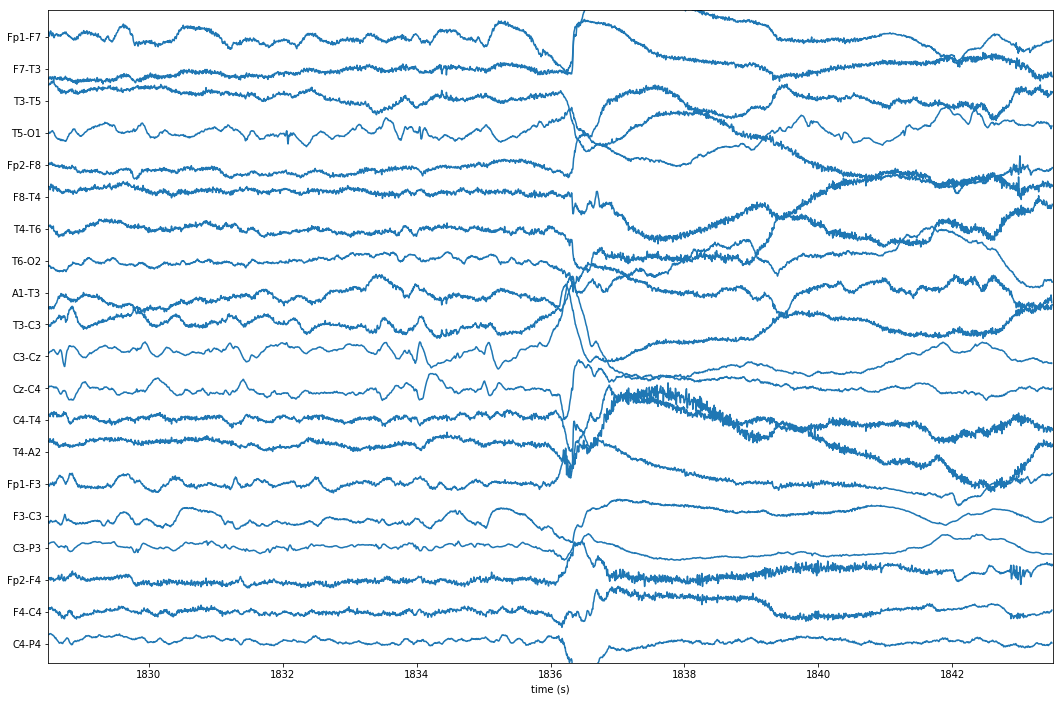

In [38]:
stacklineplot.show_montage_centered(signals, tcpmv,1836,
                        epoch_width_sec=15,
                        chstart=0, chstop=19, fs=rec.attrs['sample_frequency'],
                        ylabels=electrode_labels, yscale=3.0, topdown=True) 